In [1]:
import sys
import os
import torch
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from torchvision import transforms, utils, models
import torch.nn as nn
from tqdm import tqdm
sys.path.append('./TranSalNet/')
from utils.data_process import preprocess_img, postprocess_img
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

flag = 1 # 0 for TranSalNet_Dense, 1 for TranSalNet_Res

/usr/local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


↑↑↑  Set **flag=1** to load *TranSalNet_Dense*,set **flag=0** to load *TranSalNet_Res*. <br>
<br>
↓↓↓  Load the model and pre-trained parameters.<br>

In [2]:
if flag:
    from TranSalNet_Res import TranSalNet
    model = TranSalNet()
    model.load_state_dict(torch.load('./pretrained_models/TranSalNet_Res.pth', device))
else:
    from TranSalNet_Dense import TranSalNet
    model = TranSalNet()
    model.load_state_dict(torch.load('./pretrained_models/TranSalNet_Dense.pth', device))

model = model.to(device) 
model.eval()

TranSalNet(
  (encoder): _Encoder(
    (encoder): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
      

↓↓↓ Get the test image, feed it into the model, and get a result.

/tmp/ipykernel_22/211696508.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float)


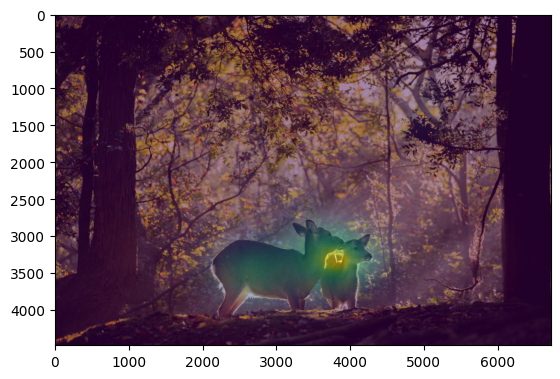

In [5]:
# こちらは適宜修正すること
test_img = 'example/4.jpg' 

img = preprocess_img(test_img) # padding and resizing input image into 384x288
img = np.array(img) / 255.
img = np.expand_dims(np.transpose(img,(2,0,1)),axis=0)
img = torch.from_numpy(img)
img = img.to(device)
img = torch.tensor(img, dtype=torch.float)
pred_saliency = model(img)
toPIL = transforms.ToPILImage()
pic = toPIL(pred_saliency.squeeze())

pred_saliency = postprocess_img(pic, test_img) # restore the image to its original size as the result

img = cv2.imread(test_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.imshow(pred_saliency, alpha=0.5)
plt.show()